In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

from w1_init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from w1_init_utils import update_parameters, predict, plot_decision_boundary, predict_dec

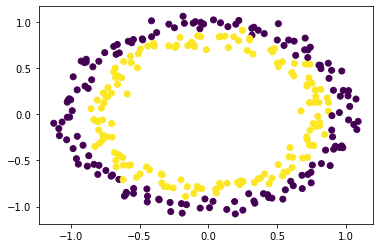

In [16]:
def load_dataset():
    np.random.seed(1)
    train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
    np.random.seed(2)
    test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
    # Visualize the data
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    test_X = test_X.T
    test_Y = test_Y.reshape((1, test_Y.shape[0]))
    return train_X, train_Y, test_X, test_Y

train_X, train_Y, test_X, test_Y = load_dataset()
plt.scatter(train_X[0,:], train_X[1,:], c = train_Y)
plt.show()

In [17]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
    learning_rate -- learning rate for gradient descent 
    num_iterations -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use ("zeros","random" or "he")
    
    Returns:
    parameters -- parameters learnt by the model
    """
        
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # Loop (gradient descent)

    for i in range(num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [18]:
def initialize_parameters_zeros(layers_dims):
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1, L):
        parameters[f"W{l}"] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters[f"b{l}"] = np.zeros((layers_dims[l], 1))
        
    return parameters


In [20]:
def initialize_parameters_random(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1, L):
        parameters[f"W{l}"] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 10
        parameters[f"b{l}"] = np.zeros((layers_dims[l], 1))
        
    return parameters

In [21]:
def initialize_parameters_he(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1, L):
        parameters[f"W{l}"] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2./layers_dims[l-1])
        parameters[f"b{l}"] = np.zeros((layers_dims[l], 1))
        
    return parameters